In [1]:
from qiskit import QuantumCircuit, assemble

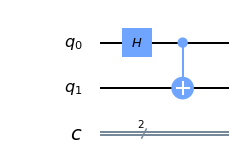

In [2]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output='mpl')

In [3]:
from qiskit import Aer

In [4]:
backend = Aer.get_backend('statevector_simulator')
statevector=backend.run(assemble(circuit)).result().get_statevector()
statevector

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

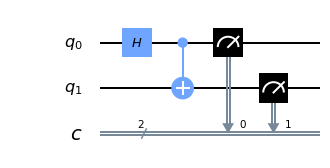

In [5]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [6]:
backend = Aer.get_backend('qasm_simulator')
counts1=backend.run(assemble(circuit)).result().get_counts()
counts1

{'00': 532, '11': 492}

In [7]:
from qiskit import IBMQ
provider  = IBMQ.load_account()

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > 1 
                                       and not x.configuration().simulator))
backend.name()

'ibmq_burlington'

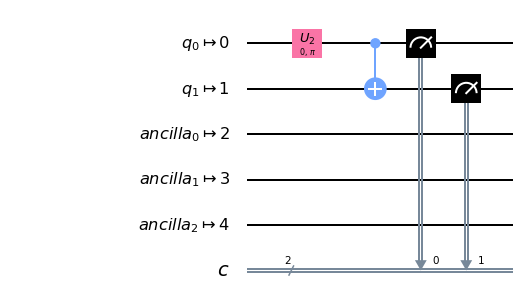

In [8]:
from qiskit import transpile

new_circuit = transpile(circuit, backend)
new_circuit.draw(output='mpl')

In [9]:
from qiskit.tools.monitor import job_monitor

job = backend.run(assemble(new_circuit))
job_monitor(job)

Job Status: job has successfully run


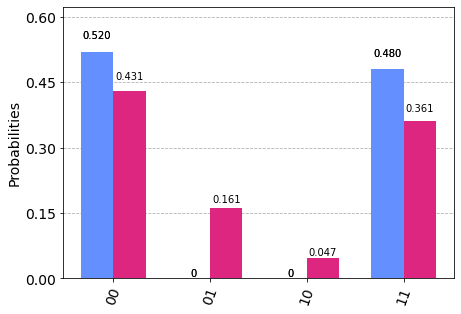

In [10]:
from qiskit.visualization import plot_histogram

result = job.result()
counts2 = result.get_counts()
plot_histogram([counts1,counts2])